##Crawling data dengan beautifulsoup

In [ ]:
!pip install requests
!pip install beautifulsoup4

### Mengambil berita dari Detik.com

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd

In [ ]:
pencarian = 'gaza'
cari = pencarian.replace(' ','+')
tglAwal = '31/10/2022'
tglAkhir = '31/11/2023'
header={
    'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'
}
berita_list = []
for halaman in range(1):
  url = f'https://www.detik.com/search/searchall?query={cari}&sortby=time&fromdatex={tglAwal}&todatex={tglAkhir}&page={halaman}'
  #mengambil data dari detik.com
  req = requests.get(url,header)
  soup = BeautifulSoup(req.text,'lxml')
  listberita = soup.find('div',class_='list media_rows list-berita')
  artikel = listberita.find_all('article')
  for x in artikel:
    url2 = x.find('a')['href']
    judul = x.find('a').find('h2').text
    #mengambil data dari setiap konten
    urlkonten = requests.get(url2,header)
    soupkonten = BeautifulSoup(urlkonten.text,'lxml')
    konten = soupkonten.find_all('div',class_='detail__body-text itp_bodycontent')
    for x in konten:
      isi = x.find_all('p')
      y = [y.text for y in isi]
      fixkonten = ''.join(y).replace('\n','').replace('ADVERTISEMENT','').replace('SCROLL TO RESUME CONTENT','')
      berita_list.append([judul,fixkonten])

###Berita berupa list dibuat kedalam DataFrame Pandas

In [ ]:
frame_berita = pd.DataFrame(berita_list,columns =['Judul','Isi'])
frame_berita

,Judul,Isi
0,Saat Jokowi Desak Gencatan Senjata di Gaza Dib...,Presiden Joko Widodo (Jokowi) mengungkap cerit...
1,"RS Indonesia di Gaza Diserang Israel, 8 Orang ...",Rumah Sakit (RS) Indonesia di Gaza dilaporkan ...
2,200 Pasien Dievakuasi dari Rumah Sakit Indones...,Sebanyak 200 pasien dievakuasi dari RS Indones...
3,Israel Tarik Duta Besar dari Afrika Selatan,Kementerian Luar Negeri Israel memutuskan mena...
4,Hamas: 13.300 Orang di Gaza Tewas Sejak 7 Oktober,Hamas melaporkan jumlah korban tewas seiring g...
5,Qatar Kecam Israel yang Serang RS Indonesia: K...,Pemerintah Qatar mengecam keras serangan Israe...
6,WHO Kaget RS Indonesia di Gaza Diserang,Rumah Sakit Indonesia di Jalur Gaza bagian uta...
7,Genosida di Gaza Tewaskan Lebih dari13 Ribu Or...,"Korban tewas akibat konflik di Gaza, Palestina..."


In [ ]:
frame_berita.to_csv('databerita.csv',sep=';',index=False)

###Membuat token dari Isi berita

In [ ]:
!pip install sastrawi

import numpy as np
import re, string
import nltk
from tqdm.auto import tqdm

nltk.download('popular')
nltk.download('stopwords')
tqdm.pandas()

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from itertools import chain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [ ]:
# Text Cleaning
def cleaning(text):
    # Menghapus tag HTML
    text = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});').sub('', str(text))

    # Mengubah seluruh teks menjadi huruf kecil
    text = text.lower()

    # Menghapus spasi pada teks
    text = text.strip()

    # Menghapus Tanda Baca, karakter spesial, and spasi ganda
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub("â", "", text)

    # Menghapus Nomor
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+', ' ', text)

    # Mengubah text yang berisi 'nan' dengan whitespace agar nantinya dapat dihapus
    text = re.sub('nan', '', text)

    return text

###Load data berita_csv

In [ ]:
# df = pd.read_csv('databerita.csv',delimiter=';')

In [ ]:
# df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

###Load data dari crawl berita di web

In [ ]:
df = frame_berita

In [ ]:
df.head()

,Judul,Isi
0,Saat Jokowi Desak Gencatan Senjata di Gaza Dib...,Presiden Joko Widodo (Jokowi) mengungkap cerit...
1,"RS Indonesia di Gaza Diserang Israel, 8 Orang ...",Rumah Sakit (RS) Indonesia di Gaza dilaporkan ...
2,200 Pasien Dievakuasi dari Rumah Sakit Indones...,Sebanyak 200 pasien dievakuasi dari RS Indones...
3,Israel Tarik Duta Besar dari Afrika Selatan,Kementerian Luar Negeri Israel memutuskan mena...
4,Hamas: 13.300 Orang di Gaza Tewas Sejak 7 Oktober,Hamas melaporkan jumlah korban tewas seiring g...


In [ ]:
# df = df[0:1]

In [ ]:
df.tail()

,Judul,Isi
3,Israel Tarik Duta Besar dari Afrika Selatan,Kementerian Luar Negeri Israel memutuskan mena...
4,Hamas: 13.300 Orang di Gaza Tewas Sejak 7 Oktober,Hamas melaporkan jumlah korban tewas seiring g...
5,Qatar Kecam Israel yang Serang RS Indonesia: K...,Pemerintah Qatar mengecam keras serangan Israe...
6,WHO Kaget RS Indonesia di Gaza Diserang,Rumah Sakit Indonesia di Jalur Gaza bagian uta...
7,Genosida di Gaza Tewaskan Lebih dari13 Ribu Or...,"Korban tewas akibat konflik di Gaza, Palestina..."


###Clean text pada Isi berita

In [ ]:
df['clean'] = df['Isi'].apply(lambda x: cleaning(x))

In [ ]:
df.head()

,Judul,Isi,clean
0,Saat Jokowi Desak Gencatan Senjata di Gaza Dib...,Presiden Joko Widodo (Jokowi) mengungkap cerit...,presiden joko widodo jokowi mengungkap cerita ...
1,"RS Indonesia di Gaza Diserang Israel, 8 Orang ...",Rumah Sakit (RS) Indonesia di Gaza dilaporkan ...,rumah sakit rs indonesia di gaza dilaporkan di...
2,200 Pasien Dievakuasi dari Rumah Sakit Indones...,Sebanyak 200 pasien dievakuasi dari RS Indones...,sebanyak pasien dievakuasi dari rs indonesia d...
3,Israel Tarik Duta Besar dari Afrika Selatan,Kementerian Luar Negeri Israel memutuskan mena...,kementerian luar negeri israel memutuskan mena...
4,Hamas: 13.300 Orang di Gaza Tewas Sejak 7 Oktober,Hamas melaporkan jumlah korban tewas seiring g...,hamas melaporkan jumlah korban tewas seiring g...


In [ ]:
df.tail()

,Judul,Isi,clean
3,Israel Tarik Duta Besar dari Afrika Selatan,Kementerian Luar Negeri Israel memutuskan mena...,kementerian luar negeri israel memutuskan mena...
4,Hamas: 13.300 Orang di Gaza Tewas Sejak 7 Oktober,Hamas melaporkan jumlah korban tewas seiring g...,hamas melaporkan jumlah korban tewas seiring g...
5,Qatar Kecam Israel yang Serang RS Indonesia: K...,Pemerintah Qatar mengecam keras serangan Israe...,pemerintah qatar mengecam keras serangan israe...
6,WHO Kaget RS Indonesia di Gaza Diserang,Rumah Sakit Indonesia di Jalur Gaza bagian uta...,rumah sakit indonesia di jalur gaza bagian uta...
7,Genosida di Gaza Tewaskan Lebih dari13 Ribu Or...,"Korban tewas akibat konflik di Gaza, Palestina...",korban tewas akibat konflik di gaza palestina ...


###Tokenize pada isi berita

In [ ]:
df['tokenize'] = df['clean'].apply(lambda x: word_tokenize(x))

In [ ]:
# df['tokenize'] = df['tokenize'].apply(lambda tokens: ' '.join(tokens))

In [ ]:
df.head()

,Judul,Isi,clean,tokenize
0,Saat Jokowi Desak Gencatan Senjata di Gaza Dib...,Presiden Joko Widodo (Jokowi) mengungkap cerit...,presiden joko widodo jokowi mengungkap cerita ...,"[presiden, joko, widodo, jokowi, mengungkap, c..."
1,"RS Indonesia di Gaza Diserang Israel, 8 Orang ...",Rumah Sakit (RS) Indonesia di Gaza dilaporkan ...,rumah sakit rs indonesia di gaza dilaporkan di...,"[rumah, sakit, rs, indonesia, di, gaza, dilapo..."
2,200 Pasien Dievakuasi dari Rumah Sakit Indones...,Sebanyak 200 pasien dievakuasi dari RS Indones...,sebanyak pasien dievakuasi dari rs indonesia d...,"[sebanyak, pasien, dievakuasi, dari, rs, indon..."
3,Israel Tarik Duta Besar dari Afrika Selatan,Kementerian Luar Negeri Israel memutuskan mena...,kementerian luar negeri israel memutuskan mena...,"[kementerian, luar, negeri, israel, memutuskan..."
4,Hamas: 13.300 Orang di Gaza Tewas Sejak 7 Oktober,Hamas melaporkan jumlah korban tewas seiring g...,hamas melaporkan jumlah korban tewas seiring g...,"[hamas, melaporkan, jumlah, korban, tewas, sei..."


In [ ]:
df.tail()

,Judul,Isi,clean,tokenize
3,Israel Tarik Duta Besar dari Afrika Selatan,Kementerian Luar Negeri Israel memutuskan mena...,kementerian luar negeri israel memutuskan mena...,"[kementerian, luar, negeri, israel, memutuskan..."
4,Hamas: 13.300 Orang di Gaza Tewas Sejak 7 Oktober,Hamas melaporkan jumlah korban tewas seiring g...,hamas melaporkan jumlah korban tewas seiring g...,"[hamas, melaporkan, jumlah, korban, tewas, sei..."
5,Qatar Kecam Israel yang Serang RS Indonesia: K...,Pemerintah Qatar mengecam keras serangan Israe...,pemerintah qatar mengecam keras serangan israe...,"[pemerintah, qatar, mengecam, keras, serangan,..."
6,WHO Kaget RS Indonesia di Gaza Diserang,Rumah Sakit Indonesia di Jalur Gaza bagian uta...,rumah sakit indonesia di jalur gaza bagian uta...,"[rumah, sakit, indonesia, di, jalur, gaza, bag..."
7,Genosida di Gaza Tewaskan Lebih dari13 Ribu Or...,"Korban tewas akibat konflik di Gaza, Palestina...",korban tewas akibat konflik di gaza palestina ...,"[korban, tewas, akibat, konflik, di, gaza, pal..."


###Menghapus stopword yang ada di isi berita

In [ ]:
stop_words = set(chain(stopwords.words('indonesian')))
df['remove_stopword'] = df['tokenize'].apply(lambda x: [w for w in x if not w in stop_words])

In [ ]:
# df['remove_stopword'] = df['remove_stopword'].apply(lambda tokens: ' '.join(tokens))

In [ ]:
df.head()

,Judul,Isi,clean,tokenize,remove_stopword
0,Saat Jokowi Desak Gencatan Senjata di Gaza Dib...,Presiden Joko Widodo (Jokowi) mengungkap cerit...,presiden joko widodo jokowi mengungkap cerita ...,"[presiden, joko, widodo, jokowi, mengungkap, c...","[presiden, joko, widodo, jokowi, mengungkap, c..."
1,"RS Indonesia di Gaza Diserang Israel, 8 Orang ...",Rumah Sakit (RS) Indonesia di Gaza dilaporkan ...,rumah sakit rs indonesia di gaza dilaporkan di...,"[rumah, sakit, rs, indonesia, di, gaza, dilapo...","[rumah, sakit, rs, indonesia, gaza, dilaporkan..."
2,200 Pasien Dievakuasi dari Rumah Sakit Indones...,Sebanyak 200 pasien dievakuasi dari RS Indones...,sebanyak pasien dievakuasi dari rs indonesia d...,"[sebanyak, pasien, dievakuasi, dari, rs, indon...","[pasien, dievakuasi, rs, indonesia, gaza, diev..."
3,Israel Tarik Duta Besar dari Afrika Selatan,Kementerian Luar Negeri Israel memutuskan mena...,kementerian luar negeri israel memutuskan mena...,"[kementerian, luar, negeri, israel, memutuskan...","[kementerian, negeri, israel, memutuskan, mena..."
4,Hamas: 13.300 Orang di Gaza Tewas Sejak 7 Oktober,Hamas melaporkan jumlah korban tewas seiring g...,hamas melaporkan jumlah korban tewas seiring g...,"[hamas, melaporkan, jumlah, korban, tewas, sei...","[hamas, melaporkan, korban, tewas, seiring, ge..."


###Streming pada isi berita

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm.auto import tqdm

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
df['steming'] = df['remove_stopword'].progress_apply(lambda x: stemmer.stem(' '.join(x)).split(' '))

  0%|          | 0/8 [00:00<?, ?it/s]

In [ ]:
df.head()

,Judul,Isi,clean,tokenize,remove_stopword,steming
0,Saat Jokowi Desak Gencatan Senjata di Gaza Dib...,Presiden Joko Widodo (Jokowi) mengungkap cerit...,presiden joko widodo jokowi mengungkap cerita ...,"[presiden, joko, widodo, jokowi, mengungkap, c...","[presiden, joko, widodo, jokowi, mengungkap, c...","[presiden, joko, widodo, jokowi, ungkap, cerit..."
1,"RS Indonesia di Gaza Diserang Israel, 8 Orang ...",Rumah Sakit (RS) Indonesia di Gaza dilaporkan ...,rumah sakit rs indonesia di gaza dilaporkan di...,"[rumah, sakit, rs, indonesia, di, gaza, dilapo...","[rumah, sakit, rs, indonesia, gaza, dilaporkan...","[rumah, sakit, rs, indonesia, gaza, lapor, ser..."
2,200 Pasien Dievakuasi dari Rumah Sakit Indones...,Sebanyak 200 pasien dievakuasi dari RS Indones...,sebanyak pasien dievakuasi dari rs indonesia d...,"[sebanyak, pasien, dievakuasi, dari, rs, indon...","[pasien, dievakuasi, rs, indonesia, gaza, diev...","[pasien, evakuasi, rs, indonesia, gaza, evakua..."
3,Israel Tarik Duta Besar dari Afrika Selatan,Kementerian Luar Negeri Israel memutuskan mena...,kementerian luar negeri israel memutuskan mena...,"[kementerian, luar, negeri, israel, memutuskan...","[kementerian, negeri, israel, memutuskan, mena...","[menteri, negeri, israel, putus, tarik, duta, ..."
4,Hamas: 13.300 Orang di Gaza Tewas Sejak 7 Oktober,Hamas melaporkan jumlah korban tewas seiring g...,hamas melaporkan jumlah korban tewas seiring g...,"[hamas, melaporkan, jumlah, korban, tewas, sei...","[hamas, melaporkan, korban, tewas, seiring, ge...","[hamas, lapor, korban, tewas, iring, gempur, i..."


In [ ]:
df['Isi_terbaru'] = df['steming'].apply(lambda tokens: ' '.join(tokens))

In [ ]:
df['Isi_terbaru']

0    presiden joko widodo jokowi ungkap cerita temu...
1    rumah sakit rs indonesia gaza lapor serang mil...
2    pasien evakuasi rs indonesia gaza evakuasi ban...
3    menteri negeri israel putus tarik duta besar p...
4    hamas lapor korban tewas iring gempur israel g...
5    perintah qatar kecam keras serang israel rumah...
6    rumah sakit indonesia jalur gaza utara sasar s...
7    korban tewas akibat konflik gaza palestina leb...
Name: Isi_terbaru, dtype: object

###Term Frekuensi

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()

In [ ]:
df['Isi_terbaru'].fillna('', inplace=True)

X_count = count_vectorizer.fit_transform(np.array(df['Isi_terbaru']))

terms_count = count_vectorizer.get_feature_names_out()
df_countvect = pd.DataFrame(data = X_count.toarray(),columns = terms_count)
df_countvect

,adhanom,adil,afp,afrika,aju,akibat,al,aljazeera,ambil,amerika,...,wafa,wanita,warga,white,who,widodo,with,wni,yerusalem,yunis
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,1,0,0,0
1,0,0,0,0,0,2,2,0,0,0,...,1,0,1,0,0,0,1,0,0,0
2,0,0,1,0,0,0,3,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,2,1,8,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,1,3,0,0
5,0,0,1,0,0,2,7,0,1,0,...,2,1,1,0,0,0,1,0,0,0
6,1,0,1,0,0,2,7,0,0,0,...,2,1,0,0,3,0,1,0,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
token_counts = df_countvect.sum(axis=0)

non_zero_token_counts = token_counts[token_counts != 0]

print("Token Counts yang Tidak Sama dengan 0:")
print(non_zero_token_counts)

Token Counts yang Tidak Sama dengan 0:
adhanom      1
adil         2
afp          5
afrika       8
aju          1
            ..
widodo       1
with         8
wni          3
yerusalem    1
yunis        1
Length: 317, dtype: int64


###TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [ ]:
X_tfidf = vectorizer.fit_transform(df['Isi_terbaru'].tolist())

terms = vectorizer.get_feature_names_out()
df_tfidfvect = pd.DataFrame(data = X_tfidf.toarray(),columns = terms)
df_tfidfvect

,adhanom,adil,afp,afrika,aju,akibat,al,aljazeera,ambil,amerika,...,wafa,wanita,warga,white,who,widodo,with,wni,yerusalem,yunis
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.053258,...,0.000000,0.000000,0.000000,0.053258,0.000000,0.053258,0.021268,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.107046,0.094754,0.000000,0.000000,0.000000,...,0.061045,0.000000,0.070742,0.000000,0.000000,0.000000,0.033709,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.065087,0.000000,0.000000,0.000000,0.195260,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046310,0.000000,0.000000,0.115963
3,0.000000,0.140017,0.039294,0.560067,0.070008,0.000000,0.000000,0.070008,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027958,0.000000,0.070008,0.000000
4,0.000000,0.000000,0.050803,0.000000,0.000000,0.000000,0.101605,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.036147,0.271541,0.000000,0.000000
5,0.000000,0.000000,0.030254,0.000000,0.000000,0.068358,0.211780,0.000000,0.053903,0.000000,...,0.077965,0.038982,0.045175,0.000000,0.000000,0.000000,0.021526,0.000000,0.000000,0.000000
6,0.061618,0.000000,0.034584,0.000000,0.000000,0.078141,0.242090,0.000000,0.000000,0.000000,...,0.089123,0.044562,0.000000,0.000000,0.184854,0.000000,0.024607,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.199020,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.226989,0.000000,0.000000,0.000000,0.000000,0.125344,0.000000,0.000000,0.000000


###Cosinus Similaritas

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
#kalimat = "".join(df['Isi_terbaru'][0].tolist())

In [ ]:
len_kalimat = df['Isi_terbaru'].shape[0]

In [ ]:
# tfidf_vectorizer = TfidfVectorizer()
# tfidf_matrix = tfidf_vectorizer.fit_transform([ kalimat1, kalimat2])

In [ ]:
temp = []
node = 0
for i in range(len_kalimat):
  for j in range(len_kalimat - i):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform([df['Isi_terbaru'][i], df['Isi_terbaru'][i+j]])
    cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
    similarity_score = cosine_sim[0][0]
    temp.append(["node-{} {}&{}".format(node, i, i+j), similarity_score])
    node +=1

In [ ]:
temp

[['node-0 0&0', 1.0],
 ['node-1 0&1', 0.024538749296313334],
 ['node-2 0&2', 0.03739724809786428],
 ['node-3 0&3', 0.0431361556240332],
 ['node-4 0&4', 0.05019558046577838],
 ['node-5 0&5', 0.027669079304474244],
 ['node-6 0&6', 0.024529314332797383],
 ['node-7 0&7', 0.060375853156782955],
 ['node-8 1&1', 1.0000000000000002],
 ['node-9 1&2', 0.509718210767913],
 ['node-10 1&3', 0.08575213059319275],
 ['node-11 1&4', 0.48806304153566954],
 ['node-12 1&5', 0.6200133129535045],
 ['node-13 1&6', 0.7208447351149514],
 ['node-14 1&7', 0.10485440764918551],
 ['node-15 2&2', 1.0000000000000002],
 ['node-16 2&3', 0.12108072974561107],
 ['node-17 2&4', 0.48801611834709935],
 ['node-18 2&5', 0.4738990797486874],
 ['node-19 2&6', 0.5037052140476784],
 ['node-20 2&7', 0.07047992008957371],
 ['node-21 3&3', 1.0000000000000009],
 ['node-22 3&4', 0.11816998655829336],
 ['node-23 3&5', 0.18087601707114997],
 ['node-24 3&6', 0.09313746654769466],
 ['node-25 3&7', 0.06379730538145352],
 ['node-26 4&4', 1

###Graph

In [ ]:
df.head()

,Judul,Isi,clean,tokenize,remove_stopword,steming,Isi_terbaru
0,Saat Jokowi Desak Gencatan Senjata di Gaza Dib...,Presiden Joko Widodo (Jokowi) mengungkap cerit...,presiden joko widodo jokowi mengungkap cerita ...,"[presiden, joko, widodo, jokowi, mengungkap, c...","[presiden, joko, widodo, jokowi, mengungkap, c...","[presiden, joko, widodo, jokowi, ungkap, cerit...",presiden joko widodo jokowi ungkap cerita temu...
1,"RS Indonesia di Gaza Diserang Israel, 8 Orang ...",Rumah Sakit (RS) Indonesia di Gaza dilaporkan ...,rumah sakit rs indonesia di gaza dilaporkan di...,"[rumah, sakit, rs, indonesia, di, gaza, dilapo...","[rumah, sakit, rs, indonesia, gaza, dilaporkan...","[rumah, sakit, rs, indonesia, gaza, lapor, ser...",rumah sakit rs indonesia gaza lapor serang mil...
2,200 Pasien Dievakuasi dari Rumah Sakit Indones...,Sebanyak 200 pasien dievakuasi dari RS Indones...,sebanyak pasien dievakuasi dari rs indonesia d...,"[sebanyak, pasien, dievakuasi, dari, rs, indon...","[pasien, dievakuasi, rs, indonesia, gaza, diev...","[pasien, evakuasi, rs, indonesia, gaza, evakua...",pasien evakuasi rs indonesia gaza evakuasi ban...
3,Israel Tarik Duta Besar dari Afrika Selatan,Kementerian Luar Negeri Israel memutuskan mena...,kementerian luar negeri israel memutuskan mena...,"[kementerian, luar, negeri, israel, memutuskan...","[kementerian, negeri, israel, memutuskan, mena...","[menteri, negeri, israel, putus, tarik, duta, ...",menteri negeri israel putus tarik duta besar p...
4,Hamas: 13.300 Orang di Gaza Tewas Sejak 7 Oktober,Hamas melaporkan jumlah korban tewas seiring g...,hamas melaporkan jumlah korban tewas seiring g...,"[hamas, melaporkan, jumlah, korban, tewas, sei...","[hamas, melaporkan, korban, tewas, seiring, ge...","[hamas, lapor, korban, tewas, iring, gempur, i...",hamas lapor korban tewas iring gempur israel g...


In [ ]:
df

,Judul,Isi,clean,tokenize,remove_stopword,steming,Isi_terbaru
0,Saat Jokowi Desak Gencatan Senjata di Gaza Dib...,Presiden Joko Widodo (Jokowi) mengungkap cerit...,presiden joko widodo jokowi mengungkap cerita ...,"[presiden, joko, widodo, jokowi, mengungkap, c...","[presiden, joko, widodo, jokowi, mengungkap, c...","[presiden, joko, widodo, jokowi, ungkap, cerit...",presiden joko widodo jokowi ungkap cerita temu...
1,"RS Indonesia di Gaza Diserang Israel, 8 Orang ...",Rumah Sakit (RS) Indonesia di Gaza dilaporkan ...,rumah sakit rs indonesia di gaza dilaporkan di...,"[rumah, sakit, rs, indonesia, di, gaza, dilapo...","[rumah, sakit, rs, indonesia, gaza, dilaporkan...","[rumah, sakit, rs, indonesia, gaza, lapor, ser...",rumah sakit rs indonesia gaza lapor serang mil...
2,200 Pasien Dievakuasi dari Rumah Sakit Indones...,Sebanyak 200 pasien dievakuasi dari RS Indones...,sebanyak pasien dievakuasi dari rs indonesia d...,"[sebanyak, pasien, dievakuasi, dari, rs, indon...","[pasien, dievakuasi, rs, indonesia, gaza, diev...","[pasien, evakuasi, rs, indonesia, gaza, evakua...",pasien evakuasi rs indonesia gaza evakuasi ban...
3,Israel Tarik Duta Besar dari Afrika Selatan,Kementerian Luar Negeri Israel memutuskan mena...,kementerian luar negeri israel memutuskan mena...,"[kementerian, luar, negeri, israel, memutuskan...","[kementerian, negeri, israel, memutuskan, mena...","[menteri, negeri, israel, putus, tarik, duta, ...",menteri negeri israel putus tarik duta besar p...
4,Hamas: 13.300 Orang di Gaza Tewas Sejak 7 Oktober,Hamas melaporkan jumlah korban tewas seiring g...,hamas melaporkan jumlah korban tewas seiring g...,"[hamas, melaporkan, jumlah, korban, tewas, sei...","[hamas, melaporkan, korban, tewas, seiring, ge...","[hamas, lapor, korban, tewas, iring, gempur, i...",hamas lapor korban tewas iring gempur israel g...
5,Qatar Kecam Israel yang Serang RS Indonesia: K...,Pemerintah Qatar mengecam keras serangan Israe...,pemerintah qatar mengecam keras serangan israe...,"[pemerintah, qatar, mengecam, keras, serangan,...","[pemerintah, qatar, mengecam, keras, serangan,...","[perintah, qatar, kecam, keras, serang, israel...",perintah qatar kecam keras serang israel rumah...
6,WHO Kaget RS Indonesia di Gaza Diserang,Rumah Sakit Indonesia di Jalur Gaza bagian uta...,rumah sakit indonesia di jalur gaza bagian uta...,"[rumah, sakit, indonesia, di, jalur, gaza, bag...","[rumah, sakit, indonesia, jalur, gaza, utara, ...","[rumah, sakit, indonesia, jalur, gaza, utara, ...",rumah sakit indonesia jalur gaza utara sasar s...
7,Genosida di Gaza Tewaskan Lebih dari13 Ribu Or...,"Korban tewas akibat konflik di Gaza, Palestina...",korban tewas akibat konflik di gaza palestina ...,"[korban, tewas, akibat, konflik, di, gaza, pal...","[korban, tewas, akibat, konflik, gaza, palesti...","[korban, tewas, akibat, konflik, gaza, palesti...",korban tewas akibat konflik gaza palestina leb...


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
sentences = [df['Isi_terbaru'][0], df['Isi_terbaru'][1], df['Isi_terbaru'][2],df['Isi_terbaru'][3],df['Isi_terbaru'][4],df['Isi_terbaru'][5]]
tfidf_matrix = tfidf_vectorizer.fit_transform(sentences).toarray()
G = nx.Graph()

temp2 = []

for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        similarity_score = cosine_similarity([tfidf_matrix[i]], [tfidf_matrix[j]])[0][0]
        temp2.append([similarity_score, sentences[i], sentences[j]])
        print(similarity_score)
        if similarity_score > 0.01:  # Sesuaikan threshold sesuai kebutuhan
            G.add_edge(sentences[i], sentences[j], weight=similarity_score)

0.01849859310322263
0.03074298001133673
0.04252863177598462
0.032916198631979
0.025187509579742643
0.4798365803752708
0.06941685595029679
0.4398018670544266
0.5967587744058298
0.1271725376075625
0.4558591613064297
0.45058954860619344
0.09546544516206137
0.17200797833720605
0.4110363667945234


In [ ]:
sorted_temp2 = sorted(temp2,reverse=True)

In [ ]:
arr_temp2 = np.array(sorted_temp2)

In [ ]:
pd.DataFrame(arr_temp2,columns=['similarity','sentences 1','sentences 2'])

,similarity,sentences 1,sentences 2
0,0.5967587744058298,rumah sakit rs indonesia gaza lapor serang mil...,perintah qatar kecam keras serang israel rumah...
1,0.4798365803752708,rumah sakit rs indonesia gaza lapor serang mil...,pasien evakuasi rs indonesia gaza evakuasi ban...
2,0.4558591613064297,pasien evakuasi rs indonesia gaza evakuasi ban...,hamas lapor korban tewas iring gempur israel g...
3,0.45058954860619344,pasien evakuasi rs indonesia gaza evakuasi ban...,perintah qatar kecam keras serang israel rumah...
4,0.4398018670544266,rumah sakit rs indonesia gaza lapor serang mil...,hamas lapor korban tewas iring gempur israel g...
5,0.4110363667945234,hamas lapor korban tewas iring gempur israel g...,perintah qatar kecam keras serang israel rumah...
6,0.17200797833720605,menteri negeri israel putus tarik duta besar p...,perintah qatar kecam keras serang israel rumah...
7,0.1271725376075625,pasien evakuasi rs indonesia gaza evakuasi ban...,menteri negeri israel putus tarik duta besar p...
8,0.09546544516206137,menteri negeri israel putus tarik duta besar p...,hamas lapor korban tewas iring gempur israel g...
9,0.06941685595029679,rumah sakit rs indonesia gaza lapor serang mil...,menteri negeri israel putus tarik duta besar p...


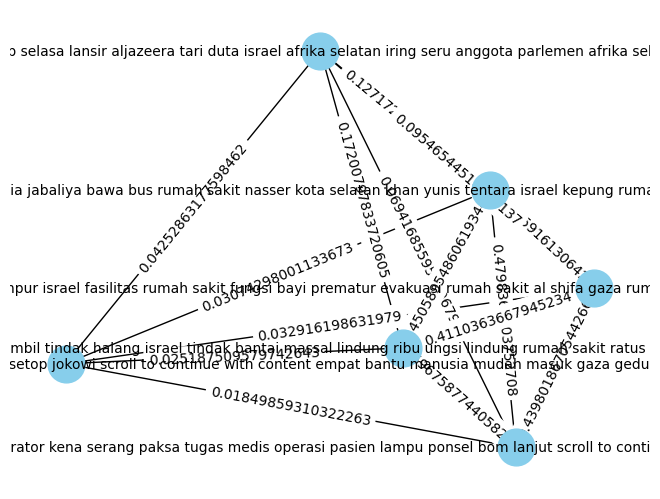

In [ ]:
# Menggambar grafik
pos = nx.spring_layout(G)
edge_labels = {(n1, n2): d['weight'] for n1, n2, d in G.edges(data=True)}

nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

###Closseness Centrality

In [ ]:
result = nx.closeness_centrality(G)

In [ ]:
result

{'presiden joko widodo jokowi ungkap cerita temu presiden amerika serikat as joe biden jokowi sebut biden meggapi nyata gencat senjata gaza seru catat jokowi cerita lepas bantu palestina lanud halim perdanakusuma jakarta timur senin jokowi poin situasi gaza sampai biden temu white house presiden joe biden temu san fransisco apec langsung kejam gaza henti gencat senjata tiga perang setop jokowi scroll to continue with content empat bantu manusia mudah masuk gaza gedung putih apec jokowi sayang jokowi ungkap desa tanggap joe biden meggapi jokowi respons joe biden jokowi nilai joe biden tampung aspirasi aspirasi catat tampung pikir pasti catat catat kait two state solution jokowi bicara tekan tekan temu apec kemarin gedung putih apec baca lengkap temu jokowi biden halaman': 1.0,
 'rumah sakit rs indonesia gaza lapor serang militer israel serang tewas delapan orang kompleks rumah sakit staf rumah sakit bantu desak pbb palang merahdilansir detikhealth al jazeera orang tewas dokter rumah sak

###Summarize text

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
pd.DataFrame(arr_temp2,columns=['similarity','sentences 1','sentences 2'])[0:2]

,similarity,sentences 1,sentences 2
0,0.5967587744058298,rumah sakit rs indonesia gaza lapor serang mil...,perintah qatar kecam keras serang israel rumah...
1,0.4798365803752708,rumah sakit rs indonesia gaza lapor serang mil...,pasien evakuasi rs indonesia gaza evakuasi ban...


In [ ]:
def summarize_paragraphs(paragraphs):
    # Menggabungkan paragraf menjadi satu teks
    text = ' '.join(paragraphs)

    # Tokenisasi kalimat
    sentences = sent_tokenize(text)

    # Menghilangkan stopwords (kata umum yang tidak memberikan makna)
    stop_words = set(stopwords.words('indonesian'))
    words = nltk.word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]

    # Menghitung frekuensi kata
    word_freq = FreqDist(filtered_words)

    # Menghitung skor setiap kalimat berdasarkan frekuensi kata
    sentence_scores = {}
    for sentence in sentences:
        for word, freq in word_freq.items():
            if word in sentence.lower():
                if sentence not in sentence_scores:
                    sentence_scores[sentence] = freq
                else:
                    sentence_scores[sentence] += freq

    # Mengambil 3 kalimat dengan skor tertinggi sebagai rangkuman
    summary_sentences = sorted(sentence_scores, key=sentence_scores.get, reverse=True)[:3]

    return ' '.join(summary_sentences)

# Contoh penggunaan
paragraphs = [
    df['Isi_terbaru'][1],
    df['Isi_terbaru'][2],
    df['Isi_terbaru'][5]
]

summary = summarize_paragraphs(paragraphs)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print("Ringkasan:")
print(summary)

Ringkasan:
rumah sakit rs indonesia gaza lapor serang militer israel serang tewas delapan orang kompleks rumah sakit staf rumah sakit bantu desak pbb palang merahdilansir detikhealth al jazeera orang tewas dokter rumah sakit luka akibat serang tim medis al jazeera rumah sakit sasar malam ingat listrik rumah sakit padam generator kena serang paksa tugas medis operasi pasien lampu ponsel bom lanjut scroll to continue with content wafa lapor tembak artileri israel rusak lantai rumah sakit pasien luka rawat rumah sakit kerja medis ribu warga palestina lindung rumah sakit paksa ungsi akibat bom israel organisasi manusia medical emergency rescue commitee mer c indonesia desak israel tarik pasu rs indonesia gaza sebut ruang operasi utama rumah sakit indonesia rusak sedia operasi pasien evakuasi rs indonesia gaza evakuasi bantu organisasi manusia komite palang merah internasional juru bicara menteri sehat gaza ashraf al qudra afp selasa sebut pasien evakuasi rumah sakit indonesia jabaliya bawa